In [1]:
from feature_extraction.orb import ORB
import os

import cv2
from matplotlib import pyplot as plt

DATA_PATH="../data/Caltech20"
TRAINING_DIR=os.path.join(DATA_PATH, "training")
TEST_DIR=os.path.join(DATA_PATH, "testing")

classes = []

features = {}
all_descriptor = []

for class_name in sorted(os.listdir(TRAINING_DIR)):
    classes.append(class_name)
    features[class_name] = {}
    class_dir = os.path.join(TRAINING_DIR, class_name)
    for file_name in sorted(os.listdir(class_dir)):
        filename = os.path.join(class_dir, file_name)
        kp, des = ORB.compute_file(filename)
        if des is not None:
            des = des[:32]
            features[class_name][file_name] = des
            all_descriptor.extend(des)

In [2]:
import numpy as np

all_descriptor = np.array(all_descriptor)

In [3]:
from clustering.kmeans import Kmeans

centers = Kmeans(all_descriptor, 20, 5)

0
[69, 172, 156, 152, 139, 141, 147, 158, 117, 149, 148, 188, 128, 167, 189, 115, 108, 167, 101, 190, 159, 158, 135, 173, 168, 171, 140, 173, 120, 157, 109, 193]
[156, 177, 164, 191, 171, 117, 116, 148, 160, 141, 113, 80, 155, 101, 86, 79, 152, 108, 158, 72, 158, 161, 138, 144, 192, 179, 134, 106, 117, 141, 170, 128]
[77, 98, 92, 144, 88, 122, 102, 89, 87, 101, 141, 102, 163, 58, 121, 93, 92, 130, 64, 88, 138, 181, 104, 57, 174, 182, 71, 68, 117, 169, 109, 102]
[86, 134, 130, 183, 119, 144, 156, 144, 101, 123, 134, 66, 134, 180, 94, 80, 191, 145, 124, 111, 130, 118, 122, 185, 146, 157, 108, 131, 96, 82, 121, 182]
[163, 139, 59, 172, 127, 189, 56, 97, 178, 73, 152, 39, 135, 174, 58, 106, 150, 67, 124, 54, 73, 75, 69, 156, 167, 203, 110, 139, 93, 41, 104, 48]
[113, 122, 152, 155, 161, 114, 175, 168, 122, 147, 180, 134, 116, 159, 151, 104, 138, 170, 106, 183, 176, 164, 104, 146, 140, 129, 172, 129, 147, 186, 164, 149]
[108, 161, 99, 133, 166, 163, 162, 111, 117, 108, 99, 183, 147, 165, 15

In [4]:
from feature_quantization.bag_of_visual_words import get_histogram

histograms = {}
for c_name in features:
    histograms[c_name] = []
    for img in features[c_name]:
        histograms[c_name].append(get_histogram(features[c_name][img], centers))

In [5]:
histograms['airplanes'][0]

array([3., 0., 1., 2., 1., 2., 1., 1., 1., 0., 3., 6., 2., 3., 0., 1., 1.,
       1., 3., 0.])

In [10]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

X = []
Y = []
for c in histograms:
    X.extend(histograms[c])
    Y.extend([c] * len(histograms[c]))
Y = encoder.fit_transform(Y)

NameError: name 'encoder' is not defined

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X, Y)


DecisionTreeClassifier()

In [8]:
test_classes = []
test_features = {}

testX = []
testY = []

for class_name in sorted(os.listdir(TEST_DIR)):
    class_dir = os.path.join(TEST_DIR, class_name)
    for file_name in sorted(os.listdir(class_dir)):
        filename = os.path.join(class_dir, file_name)
        kp, des = ORB.compute_file(filename)
        if des is not None:
            des = des[:32]
            histogram = get_histogram(des, centers)
            testX.append(histogram)
            testY.append(class_name)

testY = encoder.transform(testY)

classifier.score(testX, testY)

0.08421052631578947

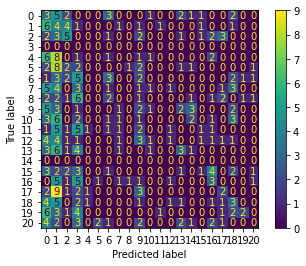

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = classifier.predict(testX)

cm = confusion_matrix(testY, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()



In [ ]:
from sklearn.metrics import classification_report

classification_report(testY, predictions target_names=encoder.classes_, zero_division=1)